Ví dụ 1 – Phở vs Bún bò Huế
Điểm mới: mức mặn = 6, mức cay = 7
Kết quả dự đoán (k=3): Bun bo

Ví dụ 2 – GrabBike vs GrabCar
Điểm mới: khoảng cách = 6 km, ngân sách = 70 nghìn đồng
Kết quả dự đoán (k=3): GrabCar



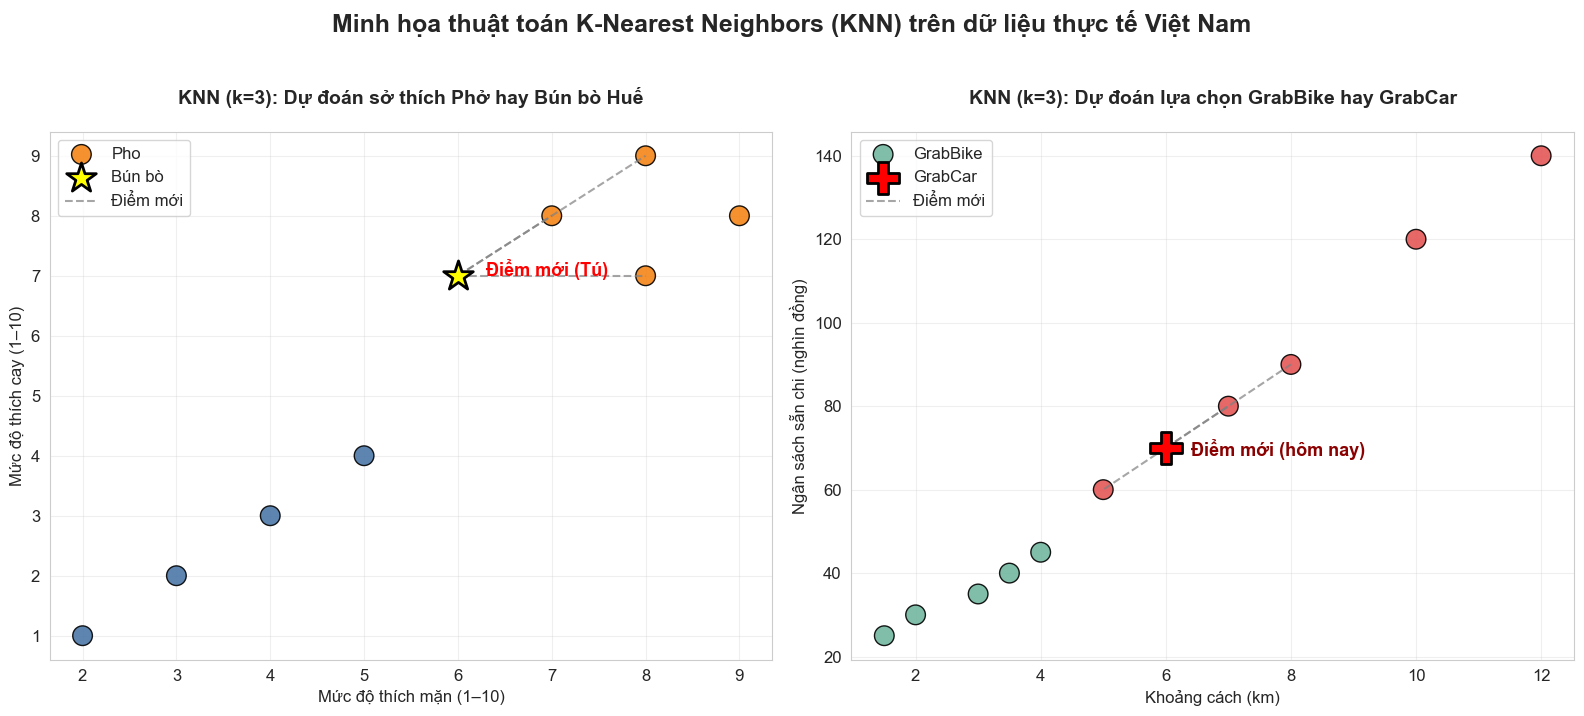

Chi tiết 3 láng giềng gần nhất – Ví dụ 1 (Phở/Bún bò)
  name  salt  spicy    food
0   Ha     7      8  Bun_bo
1  Mai     8      7  Bun_bo
2   An     8      9  Bun_bo

Chi tiết 3 láng giềng gần nhất – Ví dụ 2 (Grab)
  trip  distance_km  money_k   choice
0    7          5.0       60  GrabCar
1    9          7.0       80  GrabCar
2    2          8.0       90  GrabCar


In [1]:
# KNN – Hai ví dụ minh họa thực tế với dữ liệu đời sống Việt Nam
# Phiên bản học thuật – không cần file ngoài, chạy trực tiếp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import io

# Cài đặt giao diện đồ họa
plt.rcParams['figure.figsize'] = (16, 7)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")

# ================================================================
# DỮ LIỆU 1: Dự đoán sở thích ăn Phở hay Bún bò Huế
# Đặc trưng: mức độ thích mặn (1–10), mức độ thích cay (1–10)
# ================================================================

data_pho = """name,salt,spicy,food
An,8,9,Bun_bo
Binh,9,8,Bun_bo
Cuong,3,2,Pho
Dung,4,3,Pho
Ha,7,8,Bun_bo
Lan,2,1,Pho
Mai,8,7,Bun_bo
Nam,5,4,Pho
Tu,6,7,?
"""

df_pho = pd.read_csv(io.StringIO(data_pho))

train_pho = df_pho[df_pho['food'] != '?'].copy()
new_pho  = df_pho[df_pho['food'] == '?'].copy()

X_train_pho = train_pho[['salt', 'spicy']]
y_train_pho = train_pho['food']
X_new_pho   = new_pho[['salt', 'spicy']]

knn_pho = KNeighborsClassifier(n_neighbors=3)
knn_pho.fit(X_train_pho, y_train_pho)
pred_pho = knn_pho.predict(X_new_pho)[0]

print("Ví dụ 1 – Phở vs Bún bò Huế")
print(f"Điểm mới: mức mặn = 6, mức cay = 7")
print(f"Kết quả dự đoán (k=3): {pred_pho.replace('_', ' ')}\n")

# ================================================================
# DỮ LIỆU 2: Dự đoán lựa chọn GrabBike hay GrabCar
# Đặc trưng: khoảng cách (km), ngân sách sẵn chi (nghìn đồng)
# ================================================================

data_grab = """trip,distance_km,money_k,choice
1,3,35,GrabBike
2,8,90,GrabCar
3,2,30,GrabBike
4,10,120,GrabCar
5,4,45,GrabBike
6,12,140,GrabCar
7,5,60,GrabCar
8,1.5,25,GrabBike
9,7,80,GrabCar
10,3.5,40,GrabBike
Today,6,70,?
"""

df_grab = pd.read_csv(io.StringIO(data_grab))

train_grab = df_grab[df_grab['choice'] != '?'].copy()
new_grab   = df_grab[df_grab['choice'] == '?'].copy()

X_train_grab = train_grab[['distance_km', 'money_k']]
y_train_grab = train_grab['choice']
X_new_grab   = new_grab[['distance_km', 'money_k']]

knn_grab = KNeighborsClassifier(n_neighbors=3)
knn_grab.fit(X_train_grab, y_train_grab)
pred_grab = knn_grab.predict(X_new_grab)[0]

print("Ví dụ 2 – GrabBike vs GrabCar")
print(f"Điểm mới: khoảng cách = 6 km, ngân sách = 70 nghìn đồng")
print(f"Kết quả dự đoán (k=3): {pred_grab}\n")

# ================================================================
# TRỰC QUAN HÓA KẾT QUẢ
# ================================================================

fig = plt.figure(figsize=(16, 7))

# Biểu đồ 1: Phở vs Bún bò
ax1 = plt.subplot(1, 2, 1)
colors1 = {'Pho': '#4C78A8', 'Bun_bo': '#F58518'}
scatter1 = ax1.scatter(train_pho['salt'], train_pho['spicy'],
                       c=train_pho['food'].map(colors1), s=200, edgecolor='k', linewidth=1, alpha=0.9)

ax1.scatter(6, 7, c='yellow', s=500, edgecolor='black', linewidth=2, marker='*', zorder=5)
ax1.text(6.3, 7, 'Điểm mới (Tú)', fontsize=13, fontweight='bold', color='red')

# Vẽ đường nối tới 3 láng giềng gần nhất
neighbors_pho = knn_pho.kneighbors(X_new_pho, n_neighbors=3, return_distance=False)[0]
for idx in neighbors_pho:
    ax1.plot([6, train_pho.iloc[idx]['salt']],
             [7, train_pho.iloc[idx]['spicy']],
             color='gray', linestyle='--', linewidth=1.5, alpha=0.7)

ax1.set_title('KNN (k=3): Dự đoán sở thích Phở hay Bún bò Huế', fontsize=14, fontweight='bold', pad=20)
ax1.set_xlabel('Mức độ thích mặn (1–10)')
ax1.set_ylabel('Mức độ thích cay (1–10)')
ax1.legend(['Pho', 'Bún bò', 'Điểm mới'], loc='upper left')
ax1.grid(True, alpha=0.3)

# Biểu đồ 2: GrabBike vs GrabCar
ax2 = plt.subplot(1, 2, 2)
colors2 = {'GrabBike': '#72B7A1', 'GrabCar': '#E45756'}
ax2.scatter(train_grab['distance_km'], train_grab['money_k'],
            c=train_grab['choice'].map(colors2), s=200, edgecolor='k', linewidth=1, alpha=0.9)

ax2.scatter(6, 70, c='red', s=500, edgecolor='black', linewidth=2, marker='P', zorder=5)
ax2.text(6.4, 68, 'Điểm mới (hôm nay)', fontsize=13, fontweight='bold', color='darkred')

# Vẽ đường nối tới 3 láng giềng gần nhất
neighbors_grab = knn_grab.kneighbors(X_new_grab, n_neighbors=3, return_distance=False)[0]
for idx in neighbors_grab:
    ax2.plot([6, train_grab.iloc[idx]['distance_km']],
             [70, train_grab.iloc[idx]['money_k']],
             color='gray', linestyle='--', linewidth=1.5, alpha=0.7)

ax2.set_title('KNN (k=3): Dự đoán lựa chọn GrabBike hay GrabCar', fontsize=14, fontweight='bold', pad=20)
ax2.set_xlabel('Khoảng cách (km)')
ax2.set_ylabel('Ngân sách sẵn chi (nghìn đồng)')
ax2.legend(['GrabBike', 'GrabCar', 'Điểm mới'], loc='upper left')
ax2.grid(True, alpha=0.3)

plt.suptitle('Minh họa thuật toán K-Nearest Neighbors (KNN) trên dữ liệu thực tế Việt Nam',
             fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# ================================================================
# CHI TIẾT 3 LÁNG GIỀNG GẦN NHẤT
# ================================================================

print("="*80)
print("Chi tiết 3 láng giềng gần nhất – Ví dụ 1 (Phở/Bún bò)")
print(train_pho.iloc[neighbors_pho][['name', 'salt', 'spicy', 'food']].reset_index(drop=True))

print("\nChi tiết 3 láng giềng gần nhất – Ví dụ 2 (Grab)")
print(train_grab.iloc[neighbors_grab][['trip', 'distance_km', 'money_k', 'choice']].reset_index(drop=True))